# Análisis de los terremotos con magnitudes mayores a 6,0 en los ultimos 100 años.

Los datos para este analisis, fueron obtenidos en la  pagina oficial del USGS (Servicio Ecologico de Estados Unidos). 

Link: https://shorturl.at/aGILW


In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import datetime
from plotly.offline import init_notebook_mode, plot, iplot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [200]:
# Funcion para filtrar el formato del año 
def valid_date(row):
    try:
        datetime.datetime.strptime(row.date, '%Y-%m-%d')
        return True
    except ValueError:
        return False

In [201]:
#Importar datos y filtrarlos
df = pd.read_csv('https://raw.githubusercontent.com/JulianaCespedes/Proyecto_Final/main/earthquake_data.csv')
df['date']= [(each.split('T')[0]) for each in df.iloc[:,0]]
data = df[df.apply(valid_date, axis=1)]
data['year']= [int(each.split('-')[0]) for each in data.iloc[:,0]]
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date,year
0,2022-11-22T16:39:05.692Z,30.7832,-116.3899,10.000,6.2,mww,150.0,166.0,0.799,0.70,...,earthquake,4.76,1.846,0.029,118.0,reviewed,us,us,2022-11-22,2022
1,2022-11-22T02:37:57.665Z,-9.9018,159.5251,10.000,6.0,mww,41.0,45.0,0.621,0.61,...,earthquake,6.89,1.905,0.093,11.0,reviewed,us,us,2022-11-22,2022
2,2022-11-22T02:03:07.174Z,-9.8122,159.5958,15.000,7.0,mww,94.0,22.0,0.508,0.47,...,earthquake,5.41,1.848,0.068,21.0,reviewed,us,us,2022-11-22,2022
3,2022-11-18T13:37:08.719Z,-4.8915,100.8032,25.000,6.9,mww,90.0,43.0,2.209,0.57,...,earthquake,6.98,1.878,0.050,39.0,reviewed,us,us,2022-11-18,2022
4,2022-11-14T08:08:26.942Z,33.8016,137.2543,357.441,6.1,mww,147.0,29.0,1.164,0.62,...,earthquake,8.17,4.602,0.071,19.0,reviewed,us,us,2022-11-14,2022


In [202]:
#Filtrado manual de los datos necesarios para el analisis
print(data.keys(),'\n')

data_ = data.loc[:,['year','latitude','longitude','type','depth','mag']]
f_data = data_.sort_values(by='year', ascending=True)
f_data.loc[f_data['type'] == 'nuclear explosion','type'] = 'explosion'
f_data.head()

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'date', 'year'],
      dtype='object') 



,year,latitude,longitude,type,depth,mag
12804,1922,-15.558,-178.326,earthquake,15.0,6.66
12745,1922,24.497,121.567,earthquake,35.0,6.73
12746,1922,24.581,121.577,earthquake,15.0,6.52
12747,1922,24.445,122.446,earthquake,35.0,6.76
12748,1922,24.379,122.627,earthquake,25.0,6.98


Aqui se realiza la primer grafica, una grafica del promedio de magnitudes para cada año. Tambien se realiza la regresion lineal para comprender cual es su comportamiento a nivel matematico.

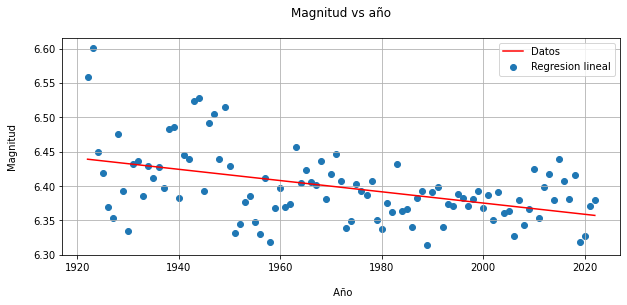


 Datos obtenidos de la regresion lineal: 
 m = [-0.00081754], b = 8.01043913938801


In [203]:
# Datos para la grafica.
av_mag = f_data.groupby(['year'])['mag'].mean()
av_mag.to_numpy()
year = f_data.year.unique()

regresion_lineal = LinearRegression()
regresion_lineal.fit(year.reshape(-1,1), av_mag) 
line = (regresion_lineal.coef_ * year) + regresion_lineal.intercept_

# Grafica de magnitud vs tiempo.
fig, ax = plt.subplots(1, figsize=(10,4))
plt.scatter(year, av_mag)
plt.plot(year , line, color = 'red')

plt.title('Magnitud vs año\n')
plt.xlabel('\n Año')
plt.ylabel('Magnitud\n')
plt.legend(['Datos', 'Regresion lineal'])

plt.grid()
plt.show()
print('\n Datos obtenidos de la regresion lineal: \n m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

Notese que, en los ultimos 100 años, para los terremotos con las magnitudes mayores a 6, estas han ido disminuyendo.

Con los datos obtenidos, se tiene que la disminucion de los terremotos es lineal, con una pendiente de recta de: -0.00082.

Al observar en la grafica se puede notar que las magnitudes, a partir del 1980 estan en un rango de 6,3 a 6,45 y que entre el 1922 y 1950 hay picos mayores a 6,45.


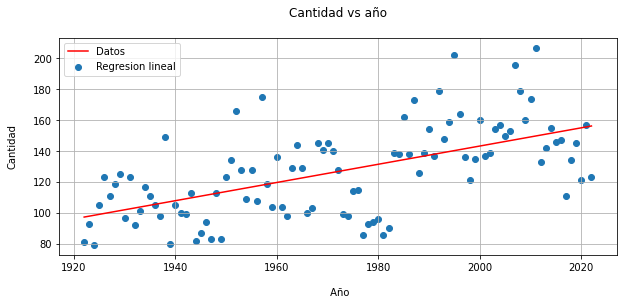


 Datos obtenidos de la regresion lineal: 
 m = [0.58969132], b = -1036.0891089108911


In [204]:
# Datos para la grafica.
quant = f_data.groupby(['year'])['mag'].count()
quant.to_numpy()

regresion_lineal = LinearRegression()
regresion_lineal.fit(year.reshape(-1,1), quant) 
line2 = (regresion_lineal.coef_ * year) + regresion_lineal.intercept_

# Grafica de cantidad vs tiempo.
fig, ax = plt.subplots(1, figsize=(10,4))
plt.scatter(year, quant)
plt.plot(year , line2, color = 'red')

plt.title('Cantidad vs año\n')
plt.xlabel('\n Año')
plt.ylabel('Cantidad\n')
plt.legend(['Datos', 'Regresion lineal'])

plt.grid()
plt.show()
print('\n Datos obtenidos de la regresion lineal: \n m = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

Ahora, al observar esta segunda grafica, se puede notar que la cantidad de sismos desde hace 100 años ha aumentado considerablemente. Pasando de un promedio de 100 sismos por año, a un promedio de 160 sismos por año.

El aumento de la cantidad de terremotos anuales ha sido lineal, con una pendiente en la recta de: 0.59.

De ambas graficas podemos observar que, la cantidad de sismos y sus magnitudes, en un periodo de tiempo tan corto, no tienen mucha influencia el uno en el otro.

In [205]:
# Usando ploty para realizar una animacion de los terremotos en los ultimos 100 años.

# Lista de tipos y años de los sismos.
years = [str(each) for each in list(f_data.year.unique())]
types = ['earthquake','explosion']
custom_colors = {
    'earthquake': 'red',
    'explosion': 'blue',
}

# Realizar la figura y los botones.
figure = {
    'data': [],
    'layout': {},
    'frames': []
}
figure['layout']['geo'] = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, 
              landcolor = 'lightgray',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'white',
              countrycolor='dimgray')
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '1922',
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': True},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Iniciar',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pausar',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Año:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# Agregar los datos.
year_ = 1922
for ty in types:
    f_data_by_year = f_data[f_data['year'] == year_]
    f_data_by_year_and_cont = f_data_by_year[f_data_by_year['type'] == ty]
    
    data_dict = dict(
    type = 'scattergeo',
    lon = f_data['longitude'],
    lat = f_data['latitude'],
    hoverinfo = 'text',
    text = ty,
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = 'white'),
        color = custom_colors[ty],
        opacity = 0.7)
)
    figure['data'].append(data_dict)
    
# Agregar los margenes de la grafica y el tiempo de aparicion los datos.
for year_ in years:
    frame = {'data': [], 'name': str(year_)}
    for ty in types:
        f_data_by_year = f_data[f_data['year'] == int(year_)]
        f_data_by_year_and_cont = f_data_by_year[f_data_by_year['type'] == ty]

        data_dict = dict(
                type ='scattergeo',
                lon = f_data_by_year_and_cont['longitude'],
                lat = f_data_by_year_and_cont['latitude'],
                hoverinfo = 'text',
                text = ty,
                mode = 'markers',
                marker = dict(
                    sizemode = 'area',
                    sizeref = 1,
                    size= 10 ,
                    line = dict(width=1,color = 'white'),
                    color = custom_colors[ty],
                    opacity = 0.7),
                name = ty,
                showlegend = True
            )
        frame['data'].append(data_dict)
    
    figure['frames'].append(frame)
    slider_step = {'args': [
        [year_],
        {'frame': {'duration': 300, 'redraw': True},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year_,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)


figure['layout']['autosize']= True
figure['layout']['title'] = 'Terremotos desde 1922 hasta 2022'
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)